# Load data into Spark DataFrame

In [115]:
from pyspark import SparkContext

In [116]:
import pyspark.sql.functions as F

In [117]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [118]:
import os
exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.0
      /_/

Using Python version 3.6.3 (default, Oct  6 2017 12:04:38)
SparkSession available as 'spark'.


In [119]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [120]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168544926|    P| 4403788|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168551156|    P|  313037|2017-03-30|
|168530895|    P|       0|2017-03-30|
|168550572|    P| 4297299|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168547857|    P| 4356304|2017-03-30|
|168551156|    P|  237508|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168548945|    P|20429929|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168549973|    P| 6461995|2017-03-30|
|168548493|    P| 4646566|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [121]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [122]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168544926|    P| 4403788|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168551156|    P|  313037|2017-03-30|
|168530895|    P|       0|2017-03-30|
|168550572|    P| 4297299|2017-03-30|
|168548493|    P| 6661513|2017-03-30|
|168532580|    P|21762903|2017-03-30|
|168547857|    P| 4356304|2017-03-30|
|168551156|    P|  237508|2017-03-30|
|168548493|    P|19586155|2017-03-30|
|168542653|    P|  133095|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168551524|    P| 6635279|2017-03-30|
|168548493|    P|20671123|2017-03-30|
|168548945|    P|20429929|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168549948|    P|23082492|2017-03-30|
|168548493|    P| 4371507|2017-03-30|
|168549973|    P| 6461995|2017-03-30|
|168548493|    P| 4646566|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [123]:
# simple count rows
df.count()

12144072

In [124]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59552

In [125]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  624508|
|    S|  769251|
|    P|10750313|
+-----+--------+



In [126]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  624508|99725077|
|    S|  769251|99725077|
|    P|10750313|99980028|
+-----+--------+--------+



In [127]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 32079|
|2017-04-01|    P|480775|
|2017-04-01|    S| 32858|
|2017-04-02|    D| 26269|
|2017-04-02|    P|437148|
|2017-04-02|    S| 31119|
|2017-04-03|    D| 20864|
|2017-04-03|    P|259853|
|2017-04-03|    S| 26954|
|2017-04-04|    D| 21722|
|2017-04-04|    P|384851|
|2017-04-04|    S| 25312|
|2017-04-05|    D| 16068|
|2017-04-05|    P|307236|
|2017-04-05|    S| 20061|
+----------+-----+------+



In [128]:
date_count = df.groupBy('date').count().toPandas()

(array([ 736419.,  736426.,  736433.,  736440.,  736447.,  736454.,  736461.]),
 <a list of 7 Text xticklabel objects>)

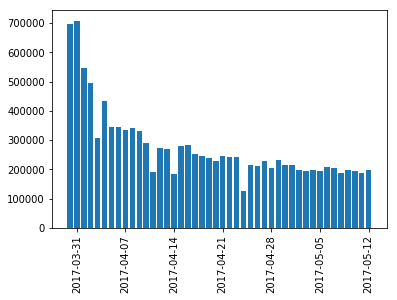

In [129]:
plt.bar(date_count['date'],date_count['count'])
plt.xticks(rotation='vertical')

# Label definition

In [130]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)


label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [131]:
label_window_end_date - label_window_start_date

datetime.timedelta(13)

In [132]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [133]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [134]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36350|
|    0|21864|
+-----+-----+



# Feature generation

In [135]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [136]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [137]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [138]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167755445|            1|
|168227697|            5|
|168338727|           13|
|168278023|            1|
|168599918|            1|
+---------+-------------+
only showing top 5 rows



In [139]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [140]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [141]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [142]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167899951|            0|            0|            1|             4|            10|
|167718831|            8|            8|           14|            29|           129|
|167947371|            0|            0|            3|            11|            37|
|167573813|            0|            0|            7|             7|            13|
|167956762|            0|            0|            0|             0|            12|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [143]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [144]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [145]:
# defined as days from last event
# can generate one feature for each type of event
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_down = spark.read.csv('../data/down_ds.csv',header=True)
df_search = spark.read.csv('../data/search_ds.csv',header=True)
df_play = df_play.withColumn('date',F.col('date').cast('date'))
df_down = df_down.withColumn('date',F.col('date').cast('date'))
df_search = df_search.withColumn('date',F.col('date').cast('date'))
df_play.show(5)
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_down_feature_window = df_down.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_search_feature_window = df_search.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168544926|    ar| 4403788|2017-03-30|        6|         28|
|168532580|    ar|21762903|2017-03-30|       67|        137|
|168551156|    ar|  313037|2017-03-30|        0|        274|
|168530895|    ar|       0|2017-03-30|      264|        265|
|168550572|    ar| 4297299|2017-03-30|       11|        272|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [146]:
df_play_feature_window

DataFrame[uid: string, device: string, song_id: string, date: date, play_time: string, song_length: string]

In [147]:
from pyspark.sql.functions import lit
timeFmt = "yyyy-MM-dd"
df_play_tmp = df_play_feature_window.groupBy('uid').agg(F.max(F.col('date')).alias('most_recent_play_date'))
df_down_tmp = df_down_feature_window.groupBy('uid').agg(F.max(F.col('date')).alias('most_recent_down_date'))
df_search_tmp = df_search_feature_window.groupBy('uid').agg(F.max(F.col('date')).alias('most_recent_search_date'))
df_play_tmp = df_play_tmp.withColumn('last_play_date', lit(label_window_start_date))
df_down_tmp = df_down_tmp.withColumn('last_down_date', lit(label_window_start_date))
df_search_tmp = df_search_tmp.withColumn('last_search_date', lit(label_window_start_date))

In [148]:
timeDiff = - (F.unix_timestamp('most_recent_play_date', format=timeFmt) - F.unix_timestamp('last_play_date', format=timeFmt))
df_play_tmp = df_play_tmp.withColumn('play_recency', timeDiff)
timeDiff = - (F.unix_timestamp('most_recent_down_date', format=timeFmt) - F.unix_timestamp('last_down_date', format=timeFmt))
df_down_tmp = df_down_tmp.withColumn('down_recency', timeDiff)
timeDiff = - (F.unix_timestamp('most_recent_search_date', format=timeFmt) - F.unix_timestamp('last_search_date', format=timeFmt))
df_search_tmp = df_search_tmp.withColumn('search_recency', timeDiff)

In [149]:
df_play_tmp.agg(F.max(F.col('play_recency'))).show()
df_down_tmp.agg(F.max(F.col('down_recency'))).show()
df_search_tmp.agg(F.max(F.col('search_recency'))).show()

+-----------------+
|max(play_recency)|
+-----------------+
|          2592000|
+-----------------+

+-----------------+
|max(down_recency)|
+-----------------+
|          2592000|
+-----------------+

+-------------------+
|max(search_recency)|
+-------------------+
|            2592000|
+-------------------+



In [150]:
df_play_tmp.fillna(3592000)
df_down_tmp.fillna(3592000)
df_search_tmp.fillna(3592000)

DataFrame[uid: string, most_recent_search_date: date, last_search_date: date, search_recency: bigint]

In [152]:
df_play_tmp

DataFrame[uid: string, most_recent_play_date: date, last_play_date: date, play_recency: bigint]

In [153]:
df_play_recent = df_label.select('uid').join(df_play_tmp.select('uid','play_recency'),on='uid',how='left')
df_down_recent = df_label.select('uid').join(df_down_tmp.select('uid','down_recency'),on='uid',how='left')
df_search_recent = df_label.select('uid').join(df_search_tmp.select('uid','search_recency'),on='uid',how='left')

In [166]:
df_play_recent

DataFrame[uid: string, play_recency: bigint]

### Profile features

In [154]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [ ]:
df_profile_tmp.groupBy('device').count().show()

In [ ]:
# check if one user has two devices
df_profile_tmp.count()

In [ ]:
df_profile_tmp.distinct().count()

In [155]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7272|
|          2|50813|
+-----------+-----+



In [156]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  141|
|          1| 7272|
|          2|50813|
+-----------+-----+



### Total play time features

In [ ]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)


### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [157]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [171]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [172]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [173]:
df_profile

DataFrame[uid: string, device_type: int]

In [174]:
#join all recency features
df_model_final = join_feature_data(df_model_final,[df_play_recent])
df_model_final = join_feature_data(df_model_final,[df_down_recent])
df_model_final = join_feature_data(df_model_final,[df_search_recent])

In [175]:
df_model_final

DataFrame[uid: string, label: int, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint, device_type: int, play_recency: bigint, down_recency: bigint, search_recency: bigint]

In [176]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)